Dataset path: /root/.cache/kagglehub/datasets/oddrationale/mnist-in-csv/versions/2
Files in dataset: ['mnist_test.csv', 'mnist_train.csv']
First few rows of the training data:
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 row

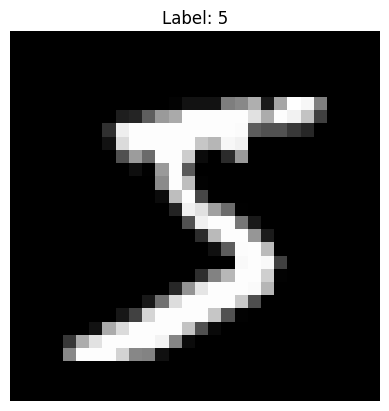

Training data shape: (48000, 28, 28, 1)
Testing data shape: (12000, 28, 28, 1)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from sklearn.model_selection import train_test_split
import kagglehub
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Download the dataset
dataset_path = kagglehub.dataset_download("oddrationale/mnist-in-csv")
print("Dataset path:", dataset_path)

# List all files in the dataset directory to verify we have the correct CSV
files = os.listdir(dataset_path)
print("Files in dataset:", files)

# Load the training CSV file into a DataFrame
train_file = os.path.join(dataset_path, "mnist_train.csv")
data = pd.read_csv(train_file)
print("First few rows of the training data:")
print(data.head())
print("Data shape:", data.shape)

# Separate labels and features
y = data['label'].values  # Digit labels
X = data.drop('label', axis=1).values  # Pixel values

# Normalize pixel values
X = X / 255.0

# Reshape the data (28,28,1)
X = X.reshape(-1, 28, 28, 1)

# Display a sample image to verify preprocessing
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y[0]}")
plt.axis('off')
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


In [ ]:
# a flatten layer for feature extraction, and a final dense layer for classification.
inputs = Input(shape=(28, 28, 1))
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
# The flatten layer output is the feature vector we extract from
flatten = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(flatten)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,098 (35.54 KB)

 Trainable params: 9,098 (35.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Evaluate performance on train and test sets
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9655 - loss: 0.1129 - val_accuracy: 0.9746 - val_loss: 0.0853
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9746 - loss: 0.0805 - val_accuracy: 0.9797 - val_loss: 0.0698
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9804 - loss: 0.0643 - val_accuracy: 0.9815 - val_loss: 0.0620
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9816 - loss: 0.0567 - val_accuracy: 0.9791 - val_loss: 0.0686
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9849 - loss: 0.0479 - val_accuracy: 0.9816 - val_loss: 0.0622
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9857 - loss: 0.0452 - val_accuracy: 0.9833 - val_loss: 0.0604
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9882 - loss: 0.0399 - val_accuracy: 0.9833 - val_loss: 0.0562
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


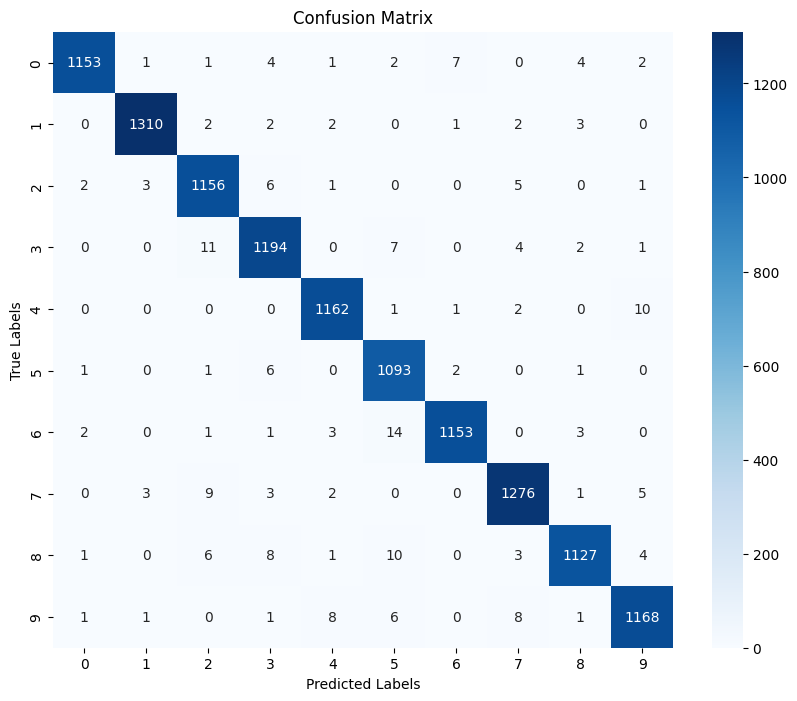

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
feature_extractor = Model(inputs=model.input, outputs=flatten)
print("Flatten output shape:", feature_extractor.output_shape)

# extract feature vectors for training and testing data (part e)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# apply KNN k = 5 with euclidean distance on the features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_features, y_train)

y_pred_knn = knn.predict(X_test_features)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("kNN on CNN Features Test Accuracy:", knn_accuracy)

Flatten output shape: (None, 784)
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
kNN on CNN Features Test Accuracy: 0.9835833333333334


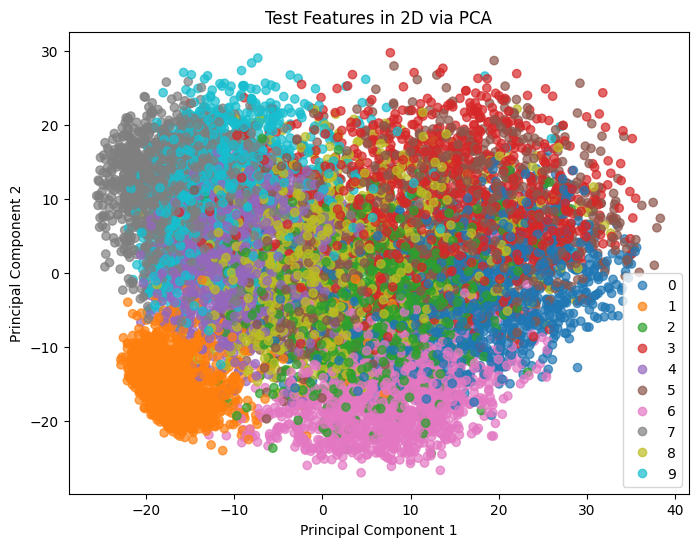

kNN on 10-dimensional PCA Features Test Accuracy: 0.9568333333333333


In [ ]:
from sklearn.decomposition import PCA

# for q (f) PCA to reduce the test features to 2 dimensions for visualization
pca_2d = PCA(n_components=2)
X_test_pca = pca_2d.fit_transform(X_test_features)

plt.figure(figsize=(8, 6))
# Use a scatter plot to display the 2D features
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)))
plt.title("Test Features in 2D via PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# for q (g) PCA with 10 principal components for both training and test sets,
# then apply KNN on these reduced features.
pca_10 = PCA(n_components=10)
X_train_pca10 = pca_10.fit_transform(X_train_features)
X_test_pca10 = pca_10.transform(X_test_features)

knn_10 = KNeighborsClassifier(n_neighbors=5, metricds='euclidean')
knn_10.fit(X_train_pca10, y_train)
y_pred_knn_10 = knn_10.predict(X_test_pca10)
knn_accuracy_10 = accuracy_score(y_test, y_pred_knn_10)
print("kNN on 10-dimensional PCA Features Test Accuracy:", knn_accuracy_10)
